# Yellow Supergiant Spectra
This code opens and plots fits files that contain high resolution Magellan Inamori Kyocera Echelle (MIKE) yellow supergiant spectra. 

First, let's import packages and open these files.

In [1]:
from astropy.io.fits import getheader
from zipfile import ZipFile
from astropy.io import fits
import numpy as np
import astropy.units as u
from matplotlib import pyplot as plt
from astropy.visualization import quantity_support  
from astropy.io.fits import getheader
from specutils import Spectrum1D
from glob import glob
from termcolor import colored
import warnings

In [2]:
from astropy.visualization import quantity_support
quantity_support()  # for getting units on the axes below  

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7f931f8c4df0>

In [3]:
# # unzip the data.zip file
# file_name = '/Users/kchen/FYPS/data.zip'

# with ZipFile(file_name, 'r') as zip:
#     zip.printdir()
#     zip.extractall()

# spectra = ZipFile(file_name, 'r')

# # print the files in the zip file
# number_of_spectra = len(spectra.namelist())

In [4]:
# # print how many files are in the folder
# number_of_spectra

In [5]:
#grab anything that contains '.fits'
files = glob('*.fits')

# check what strings glob() took
print(files)
print(len(files))

['hd269879_122722.fits', 'hd269857_122722.fits', 'hd27005_122722.fits', 'hd269723_122722.fits', 'hd269662_122622.fits', 'hd269070_122622.fits', 'sk_69_99_122622.fits', 'hd269697_122722.fits', 'hd269902_122722.fits', 'w60_d17_122622.fits', 'hd269331_122622.fits', 'hd269661_122622.fits', 'hd268727_010323.fits', 'hd269762_122722.fits', 'hd269953_122722.fits', 'hd33579_122622.fits', 'hv2450_122622.fits', 'hv883_010323.fits', 'hd269604_122622.fits', 'hd268819_122622.fits', 'j05344_122722.fits', 'cd_69_310_122622.fits', 'sp77_31_16_122622.fits', 'cpd-69-496_122722.fits', 'hd269781_122722.fits', 'hd268687_122622.fits', 'sp77_48_6_122622.fits', 'hd268828_010323.fits', 'hd269651_122622.fits', 'hd269982_122722.fits', 'sk_69_148_122622.fits', 'hd268949_010323.fits', 'hd268946_122622.fits', 'hd269840_122722.fits', 'rm177_010323.fits', 'hd269110_122622.fits', 'hd269787_122722.fits', 'hd269807_122722.fits', 'hd268971_122622.fits', 'hd268865_010323.fits']
40


In [6]:
def fitsfile(i):
    """
    Takes an index value i and
    opens the fits file corresponding to that number and prints which file it is
    """
    # open the fits file
    hdulist = fits.open(str(files[i]))
    hdr = getheader(files[i])
    
    # read the fits file with specutils
    spec1d = Spectrum1D.read("/Users/kchen/FYPS/"+ files[i])
    filename = '/Users/kchen/FYPS/' + files[i]
    
    # The spectrum is in the first HDU of this file.
    with fits.open(filename) as f:  
        specdata = f[0].data
    
    # clearly divide and label each spectrum with file name and SIMBAD object name
    text = colored('----------------\nThis graph is: ' + files[i] + ' and index ' + str(i) + ' and named ' + hdr['OBJECT'], 'red', attrs=['bold'])  
    print(text)  
    #print(specdata)
    #print(spec1d)
    
    return spec1d, hdr

# Plotting the data
Now after unzipping the data folder and opening the fits files, we can plot the graphs!

In [7]:
# function to print any graph
def graph(i):
    """
    Takes an integer value i corresponding to the index of 'files' and 
    outputs that spectra.
    """
    # unpack and open each file
    spec1d, hdr = fitsfile(i)
    
    # plot
    ax = plt.subplots(dpi=50)[1] 
    ax.plot(spec1d.spectral_axis, spec1d.flux)
    
    # label axes
    ax.set_xlabel('Wavelength (Å)', fontsize=15)
    ax.set_ylabel('Flux (erg/s/cm^2/Å)', fontsize=15)
    
    plt.show()
    

----------------
This graph is: hd269723_122722.fits and index 3 and named HD269723


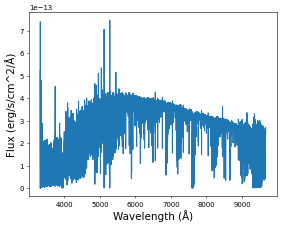

In [31]:
# plot every file
# for i in range(len(files)):
#     graph(i)
graph(3)

# The H-alpha line
Now we can zoom into these graphs and look at specific parts of it. We are looking for "warm" outflows (∼5-10 thousand K), which are tracable in the Hα line. The Hα line appears at 6562.8 Å when a hydrogen electron moves between the second (n=2) and third atomic energy level (n=3). This line is significant because it is the strongest H line in the optical, and it indicates the presence of hydrogen. Since most stellar envelopes are predominantly composed of hydrogen, the Hα in emission is a key to understanding the environment surrounding an observed star. 

In [29]:
# zoom in on h-alpha line
def halpha(i):
    """
    This takes an integer value i and 
    outputs the graph corresponding to that number in the 'files' array,
    with a wavelength between 6560 and 6570.
    """
    
    # unpack and open each file
    spec1d, hdr = fitsfile(i)
    
    # plot with higher resolution
    ax = plt.subplots(dpi=300)[1] 
    ax.plot(spec1d.spectral_axis, spec1d.flux, color='tab:red')
    
    # zooming into h-alpha line
    ax.set_xlim((6525, 6600))
    
    # label axes
    ax.set_xlabel('Wavelength (Å)', fontsize=15)
    ax.set_ylabel('Flux (erg/s/cm^2/Å)', fontsize=15)
    
    # plot
    plt.show()


----------------
This graph is: hd33579_122622.fits and index 15 and named HD33579


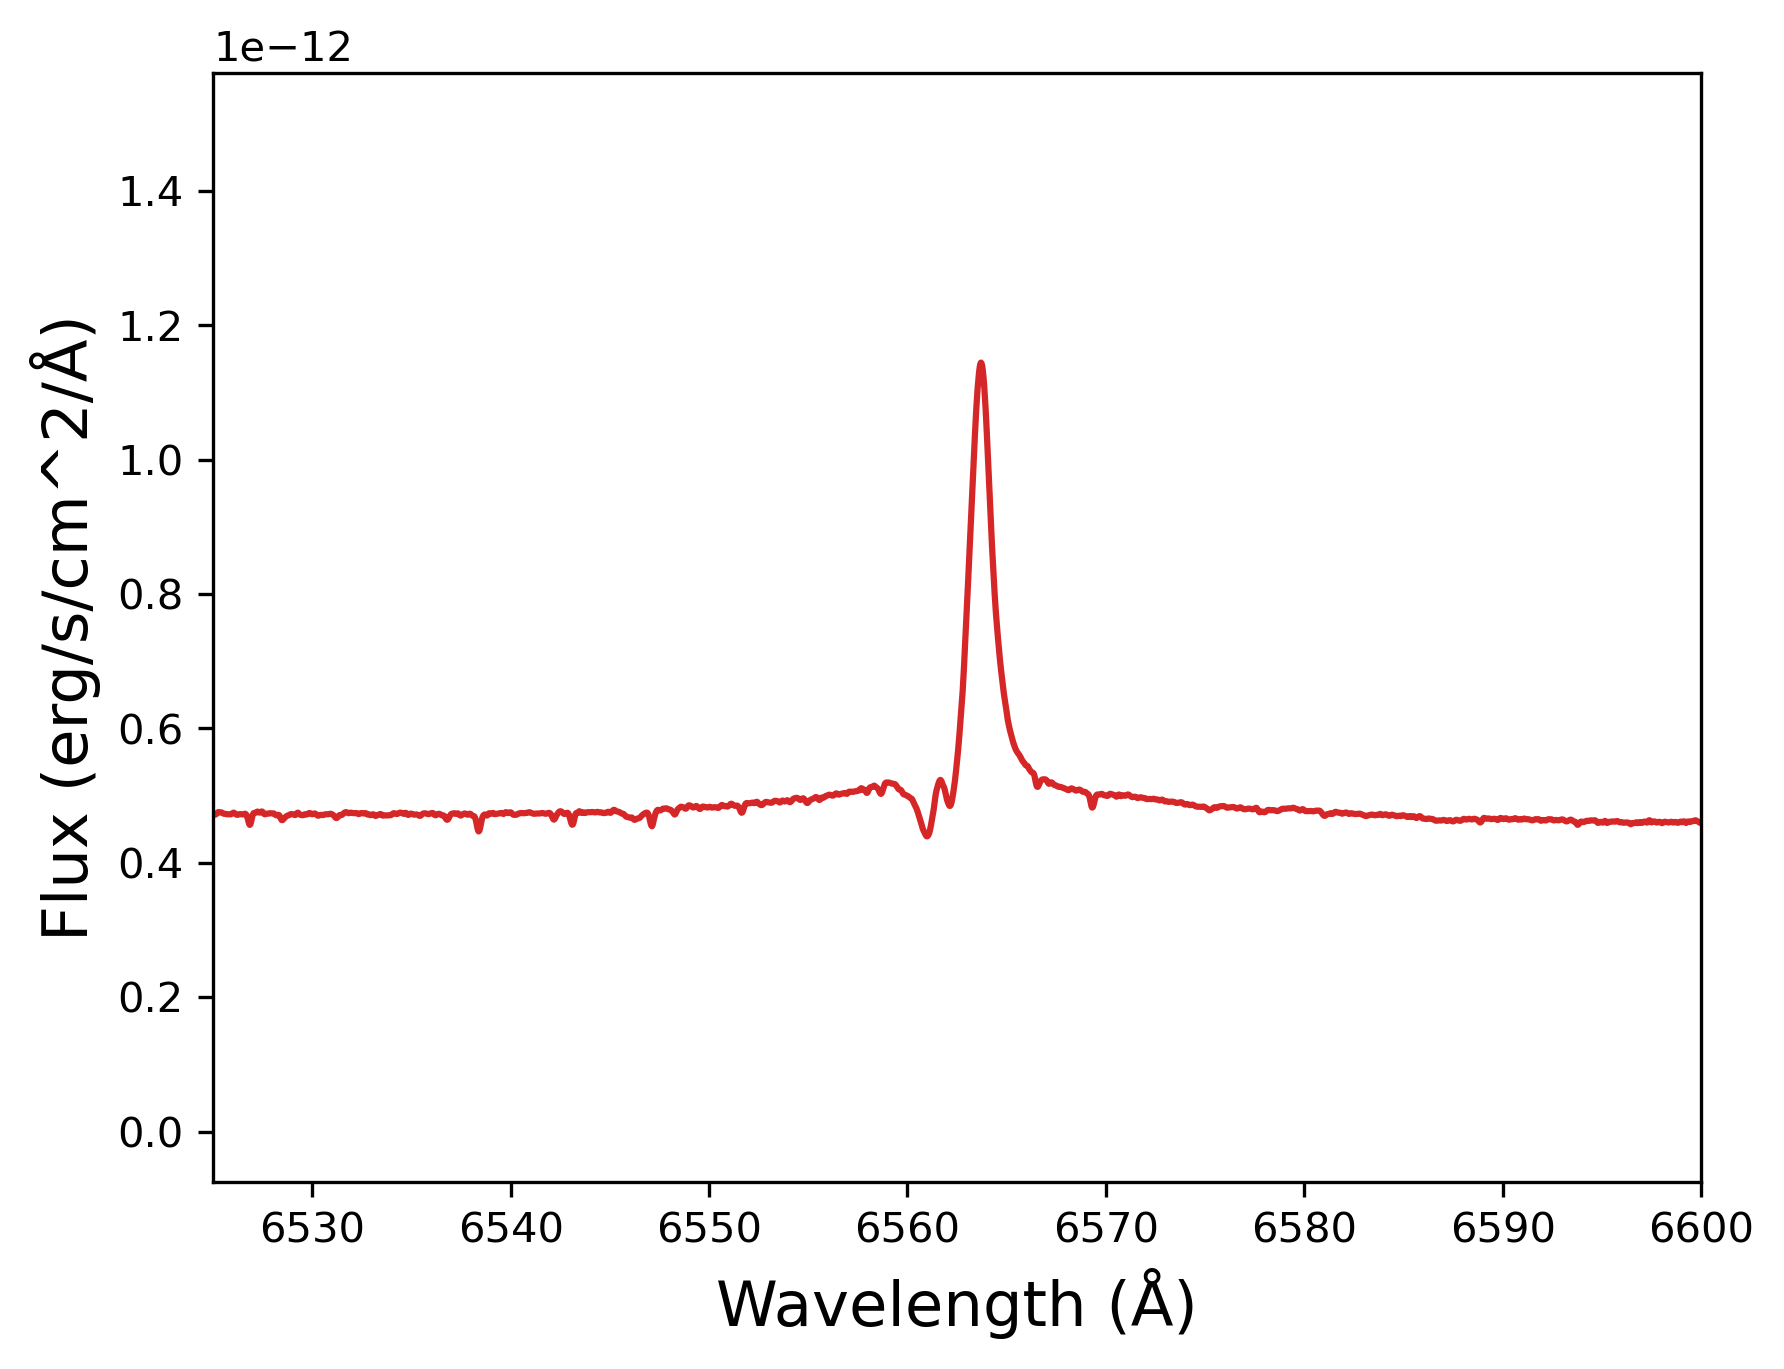

In [30]:
# graph all spectra at the h-alpha line
# for i in range(len(files)):
#     halpha(i)
halpha(15)

# Categorizing the H-alpha line
Looking at each line, we can categorize the graphs into two categories: ones that have emission and ones that don't. The emission line indicates outflowing circumstellar material outside of the line of sight. Generally, stars with an emission line are more rare because they are caused by circumstellar gas being ejected from the star in a stellar wind. Out of all 39 spectra, I found 28 graphs to indicate emission at the Hα line.

## my categories
ones that look like emission line around 6562.8 A:
0, 1, 3, 4, 5, 6, 8, 10, 11, 12, 14, 15, 17, 18, 19, 21, 22, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35

ones that look like only absorption:
2, 7, 9, 13, 16, 20, 23, 25, 26, 36, 37, 38

Some need more zoom to determine the category they belong in!
6, 9, 11, 12, 16, 18, 19, 20, 21, 23, 25, 28, 30, 34, 35, 38

In [9]:
# zoom even more into h-alpha
def halphazoom(i,n,m):
    """
    This takes integer values i, n, m, and 
    outputs the graph corresponding to index i in the 'files' array,
    displaying a wavelength between 6548 and 6580 Å and a flux between n and m.
    """
    
    # unpack and open each file
    spec1d, hdr = fitsfile(i)
    
    # plot with higher resolution
    ax = plt.subplots(dpi=300)[1] 
    ax.plot(spec1d.spectral_axis, spec1d.flux, color='tab:red')
    
    # zooming into h-alpha line
    ax.set_xlim((6548,6580))
    
    # label axes
    ax.set_xlabel('Wavelength (Å)', fontsize=15)
    ax.set_ylabel('Flux (erg/s/cm^2/Å)', fontsize=15)
    
    # set y limits based on eye based on the plots from graph1()
    ax.set_ylim((n,m))
    
    # show plot
    plt.show()

In [97]:
# zooming in on graphs 6, 9, 11, 12, 16, 18, 19, 20, 21, 23, 25, 28, 30, 34, 35, 37
halphazoom(2, 0.3*10**-13, 1.2*10**-13)
halphazoom(6, 0.2*10**-13, .4*10**-13)
halphazoom(9, 0, .15*10**-12)
halphazoom(11, .07*10**-12, .4*10**-12)
halphazoom(12, 0, .5*10**-13)
halphazoom(16, 0, .06*10**-12)
halphazoom(18, .05*10**-12, .1*10**-12)
halphazoom(19, 0, .3*10**-12)
halphazoom(20, .02*10**-12, .1*10**-12) #n
halphazoom(21, .02*10**-12, .1*10**-12) #y
halphazoom(23, 0, .2*10**-12)
halphazoom(25, 0, .15*10**-12)
halphazoom(28, .05*10**-12, .15*10**-12)
halphazoom(30, 0*10**-12, .05*10**-12)
halphazoom(34, 0, .15*10**-12)
halphazoom(35, .07*10**-12, .4*10**-12) #y
halphazoom(37, .02*10**-12, .06*10**-12)

# Categorized
Now we can make functions to tell us automatically if a spectrum has an emission line at 6562.8 Å or only plot ones with/without the emission line.

In [74]:
# function to determine if the graph has emission line at 6562.8 A
emission_list= [0, 1, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 17, 18, 19, 21, 22, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35]
def emission(i):
    """
    Takes integer i that corresponds to index of the array 'files' and 
    outputs boolean True/False if it contains an emission line at 6562.8 Å.
    """
    if i in emission_list:
        return True
    else:
        return False

In [75]:
# prints numbers/names of files that don't have emission lines
for i in range(39):
    if emission(i)==False:
        print(str(i) + ', graph ' + files[i] + ' does not have an emission line')

2, graph hd27005_122722.fits does not have an emission line
7, graph hd269697_122722.fits does not have an emission line
9, graph w60_d17_122622.fits does not have an emission line
16, graph hv2450_122622.fits does not have an emission line
20, graph j05344_122722.fits does not have an emission line
23, graph cpd-69-496_122722.fits does not have an emission line
25, graph sp77_48_6_122622.fits does not have an emission line
26, graph hd268828_010323.fits does not have an emission line
36, graph hd269807_122722.fits does not have an emission line
37, graph hd268971_122622.fits does not have an emission line
38, graph hd268865_010323.fits does not have an emission line


In [79]:
# function that only plots ones with emission
def halpha_em(i):
    """
    This takes integer i that corresponds to each graph in the array 'files' and only
    outputs all the graphs that contain emission lines at 6562.8 Å
    with a wavelength between 6540 and 6580.
    """
    # iterate through the entire array of files and test if there is emission at h-alpha line
    if emission(i)==True:
        # open and unpack fits file
        spec1d, hdr = fitsfile(i)
    
        # plot if true
        ax = plt.subplots(dpi=300)[1] 
        ax.plot(spec1d.spectral_axis, spec1d.flux)
        ax.set_xlim((6540,6580))
        ax.set_ylabel('Flux (erg/s/cm^2/Å)', fontsize=15)
        ax.set_xlabel('Wavelength (Å)', fontsize=15)
        plt.show()


In [98]:
# plots all graphs with emission lines
for i in range(39):
    halpha_em(i)

In [82]:
# function that only plots ones with NO emission lines
def halpha_noem(i):
    """
    This takes integer i that corresponds to each graph in the 'files' array and only
    outputs all the graphs that DO NOT contain emission lines at 6562.8 Å
    with a wavelength between 6540 and 6580.
    """
    
    # iterate through the entire array of files and test if there is emission at h-alpha line
    if emission(i)==False:
        # open and unpack fits file
        spec1d, hdr = fitsfile(i)
        
        # plot if false
        ax = plt.subplots(dpi=300)[1] 
        ax.plot(spec1d.spectral_axis, spec1d.flux)
        ax.set_xlim((6540,6580))
        ax.set_ylabel('Flux (erg/s/cm^2/Å)', fontsize=15)
        ax.set_xlabel('Wavelength (Å)', fontsize=15)
        plt.show()

In [99]:
# plot all those with no emission lines
for i in range(39):
    halpha_noem(i)

----------------
This graph is: hd269762_122722.fits and index 13 and named HD269762


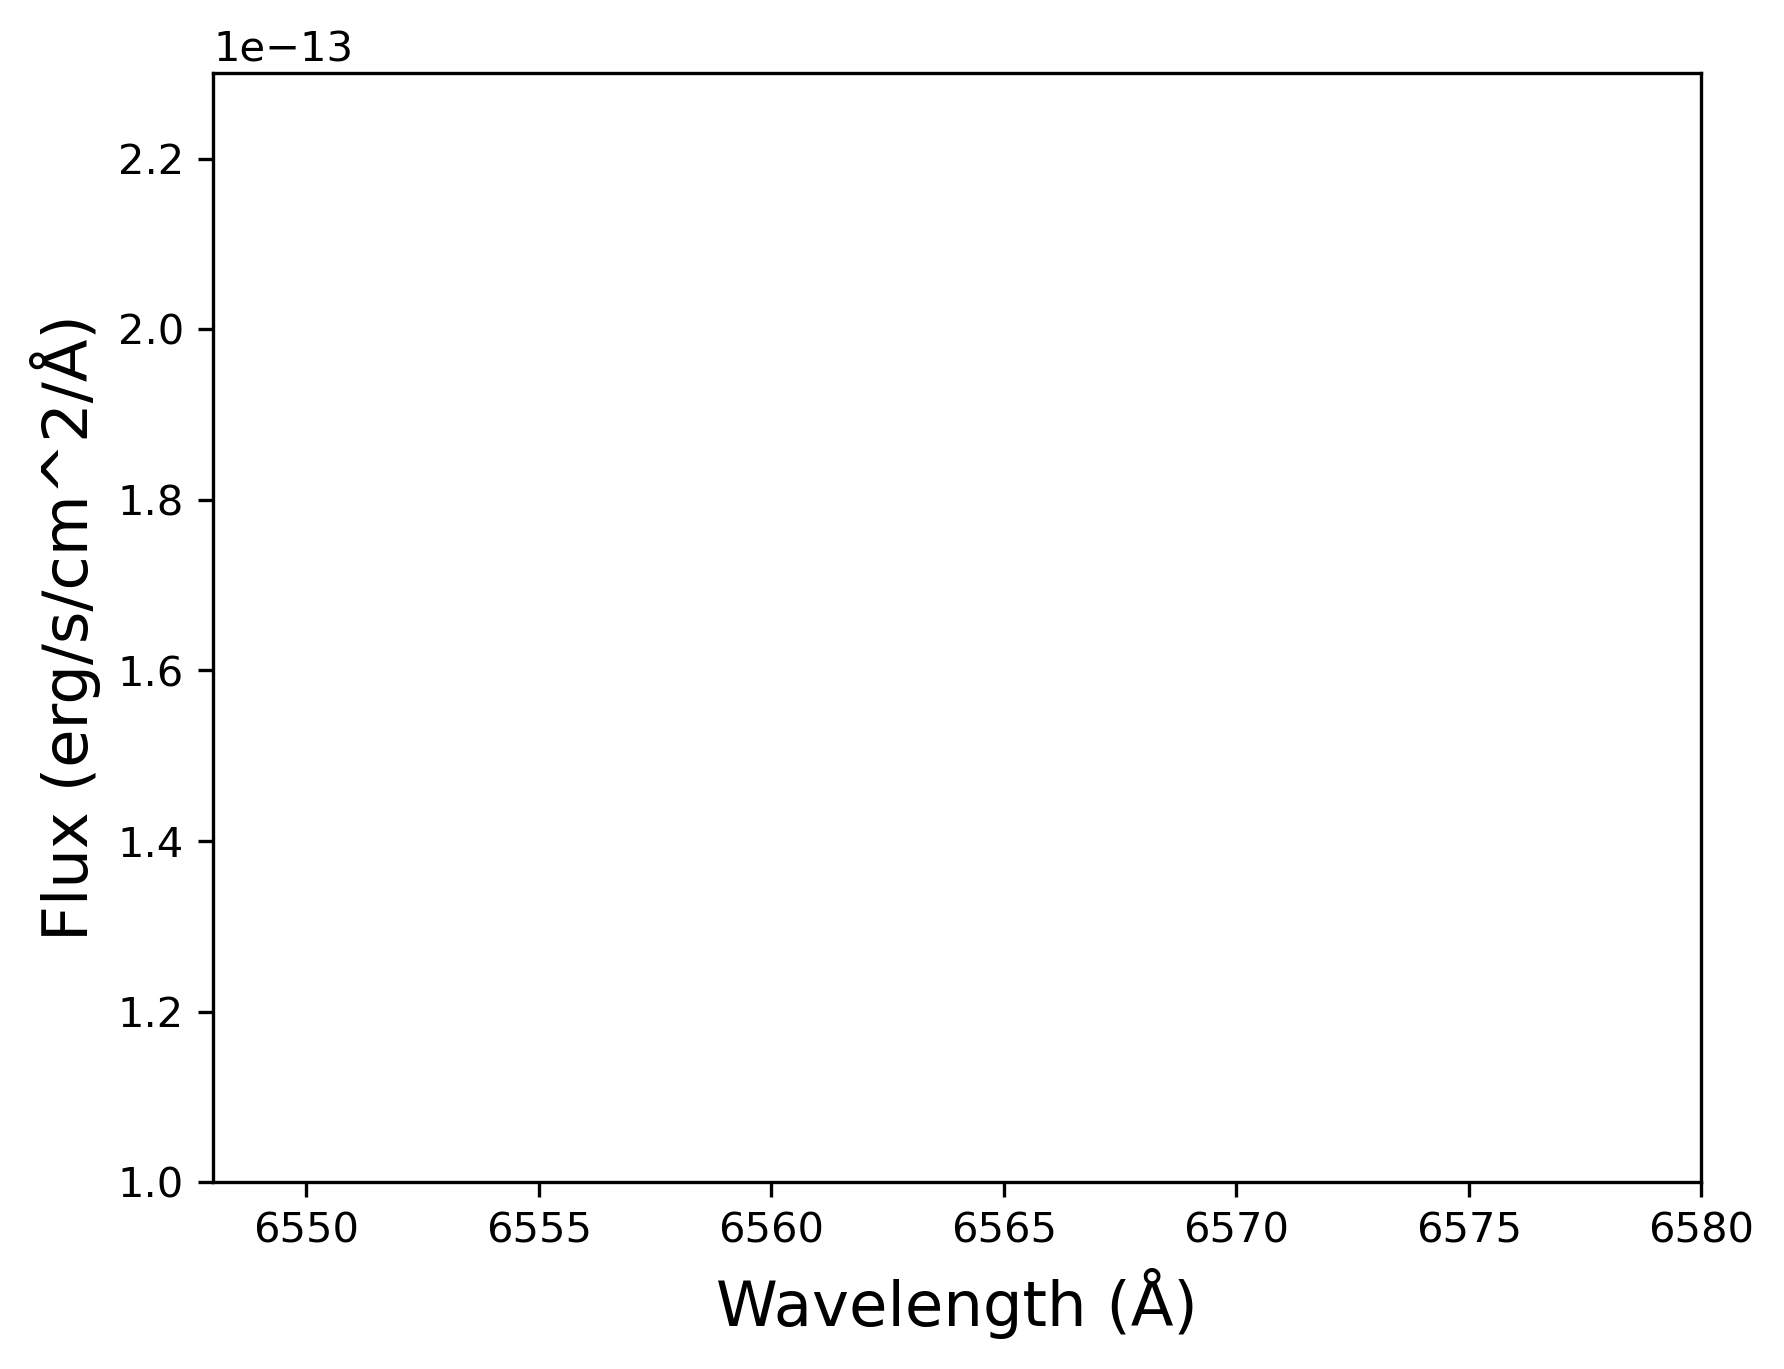

In [13]:
# very interesting h-alpha line!
halphazoom(13, 1e-13, 2.3e-13)

In [13]:
def name(i):
    spec1d, hdr = fitsfile(i)
    print(str(i) + ') ' + hdr['OBJECT'])

In [14]:
for i in range(len(files)):
    name(i)
    warnings.filterwarnings('ignore')

----------------
This graph is: hd269879_122722.fits and index 0 and named HD269879
0) HD269879
----------------
This graph is: hd269857_122722.fits and index 1 and named HD269857
1) HD269857
----------------
This graph is: hd27005_122722.fits and index 2 and named HD27005
2) HD27005
----------------
This graph is: hd269723_122722.fits and index 3 and named HD269723
3) HD269723
----------------
This graph is: hd269662_122622.fits and index 4 and named HD269662
4) HD269662
----------------
This graph is: hd269070_122622.fits and index 5 and named HD269070
5) HD269070
----------------
This graph is: sk_69_99_122622.fits and index 6 and named SK_69_99
6) SK_69_99
----------------
This graph is: hd269697_122722.fits and index 7 and named HD269697
7) HD269697
----------------
This graph is: hd269902_122722.fits and index 8 and named HD269902
8) HD269902
----------------
This graph is: w60_d17_122622.fits and index 9 and named W60_D17
9) W60_D17
----------------
This graph is: hd269331_12262

In [13]:
for i in range(39):
    warnings.filterwarnings('ignore')
    spec1d, hdr = fitsfile(i)
    spec1d13 = spec1d
    for j in range(39):
        spec1d, hdr = fitsfile(j)
        warnings.filterwarnings('ignore')
        if np.all(spec1d13.flux==spec1d.flux):
            print('true'+str(i))


true0
true1
true2
true3
true4
true5
true6
true7
true8
true9
true10
true11
true12
true13
true14
true15
true16
true17
true18
true19
true20
true21
true22
true23
true24
true25
true26
true27
true28
true29
true30
true31
true32
true33
true34
true35
true36
true37
true38
